## Task1
Cleaning data, address missing values, duplicates, data type conversions, transformations and multicolinearity, including outliers.
## Task2
Perform some exploratory data analyst. Visualize specific parameters as well as variable distributions.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import pickle

In [2]:
%matplotlib inline

In [3]:
sns.set(color_codes=True)

In [4]:
pd.set_option('display.max_columns', 100)

## A. Loading Data, Data Types, Data Statistics

In [5]:
train_data = pd.read_csv('historical_customer_data.csv')
history_data = pd.read_csv('historical_price_data.csv')
churn_data = pd.read_csv('churn_indicator.csv')

In [6]:
train_data.head(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [7]:
history_data.head(5)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
churn_data.head(5)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [9]:
train = pd.merge(train_data, churn_data, on='id')

In [10]:
train.head(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [11]:
pd.DataFrame({"Data Type": train.dtypes})

,Data Type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [12]:
pd.DataFrame({"Data type": history_data.dtypes})

,Data type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


In [13]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [14]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [15]:
pd.DataFrame({"Missing value(%)": train.isnull().sum()/len(train.index)*100})

,Missing value(%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [16]:
pd.DataFrame({"Missing value(%)": history_data.isnull().sum()/len(history_data.index)*100})

,Missing value(%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


## B. Data Visulization, Exploratory Data Analyst

#### B_1. Churning Rate

In [17]:
churn = train[["id", "churn"]]
churn

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


In [18]:
churn.columns = ["Companies", "churn"]

In [19]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    for p in ax.patches:
        value = str(round(p.get_height(), 1))
        if value == 0:
            continue
        ax.annotate(value, ((p.get_x()+p.get_width()/2)*pad -0.05, (p.get_y()+p.get_height()/2)*pad),
                   color = colour,
                   size=textsize)

In [20]:
def plot_stacked_bars(dataframe, title_, size_=(18,10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(kind="bar", stacked = True, figsize = size_, rot=rot_, title=title_)
    
    annotate_stacked_bars(ax, textsize=14)
    plt.legend(["Retention", "Churn"], loc = legend_)
    plt.ylabel("Company base(%)")
    plt.show()

In [21]:
churn_total = churn.groupby(churn["churn"]).count()
churn_total

,Companies
churn,
0,14501
1,1595


In [22]:
churn_percentage = churn_total/churn_total.sum()*100
churn_percentage

,Companies
churn,
0,90.090706
1,9.909294


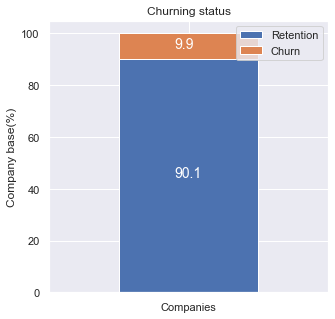

In [23]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5,5))

About 10% of the total customers have churned

#### B_2. Activity Distribution
Let's see the relationship between activity distribution and churning rates.

In [24]:
activity = train[["id", "activity_new", "churn"]]
activity

,id,activity_new,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,0
4,bba03439a292a1e166f80264c16191cb,NaN,0
...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,0


In [25]:
activity = activity.groupby([activity["activity_new"], 
                             activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

In [26]:
activity

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0
...,...,...
opoiuuwdmxdssidluooopfswlkkkcsxf,NaN,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,NaN,2.0
wceaopxmdpccxfmcdpopulcaubcxibuw,NaN,1.0


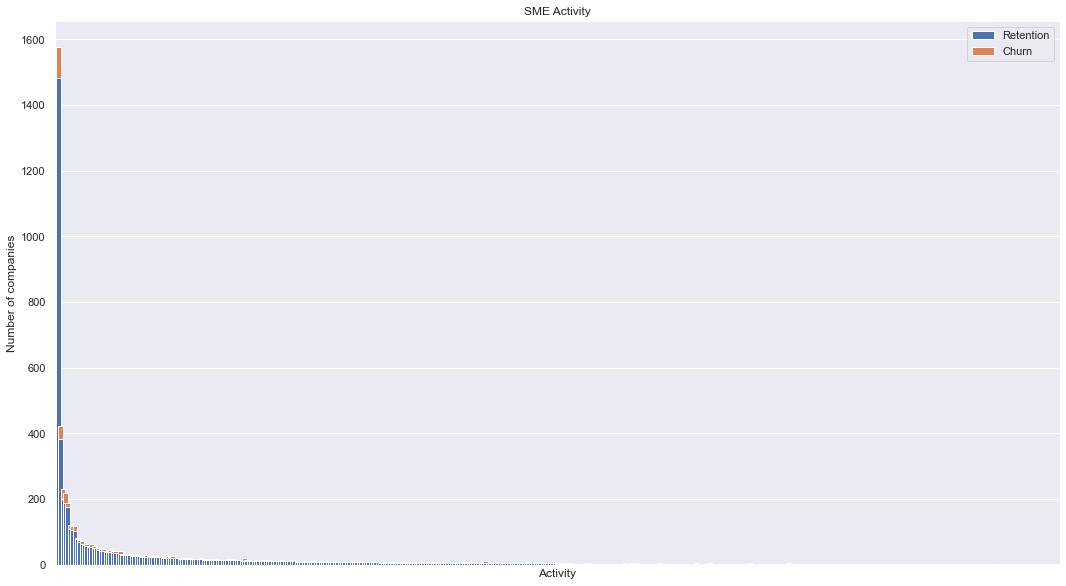

In [27]:
activity.plot(kind="bar", figsize=(18,10), width=2, stacked=True, title="SME Activity")
plt.ylabel ("Number of companies")
plt.xlabel("Activity")
plt.legend(["Retention", "Churn"], loc="upper right")
plt.xticks([])
plt.show()

We can see that churn is not specifically related to any activity in particular.

#### Sales Channels
Let's see the relationship betwwen different sales channels and churning rates.

In [28]:
channel = train[["id", "channel_sales", "churn"]]

In [29]:
channel = channel.groupby([channel["channel_sales"],
                          channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0


In [30]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending = False)
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.501694,12.498306
usilxuppasemubllopkaafesmlibmsdf,89.612188,10.387812
ewpakwlliwisiwduibdlfmalxowmwpci,91.511387,8.488613
lmkebamcaaclubfxadlmueccxoimlema,94.404245,5.595755
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


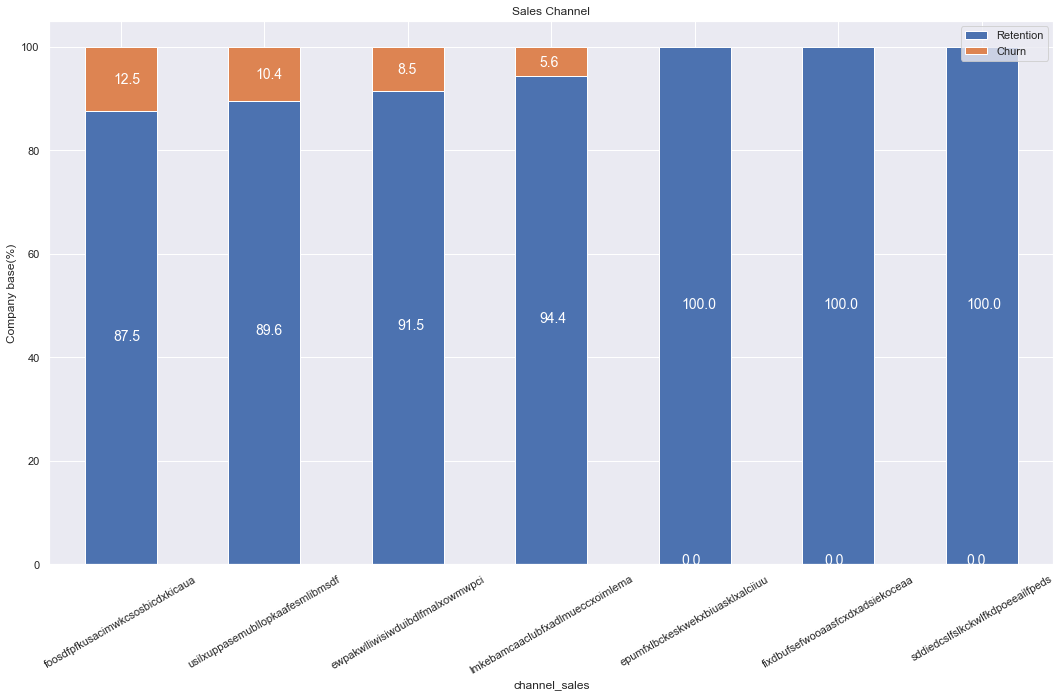

In [31]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

There is nothing out of normal from the graph.

#### B_3. Consumption Distribution
Let's see the distribution of consumption over the last year and last month

In [32]:
consumption = train[["id", "cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

In [33]:
consumption

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,831.80,f,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,32270,47940,0,0.00,t,0
16092,d0a6f71671571ed83b2645d23af6de00,7223,0,181,15.94,f,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,18.05,f,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,0.00,f,0


In [34]:
def plot_distribution(dataframe, column, ax, bins_=50):
    
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                        "Churn": dataframe[dataframe["churn"]==1][column]})
    
    temp[["Retention", "Churn"]].plot(kind = 'hist', bins=bins_, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

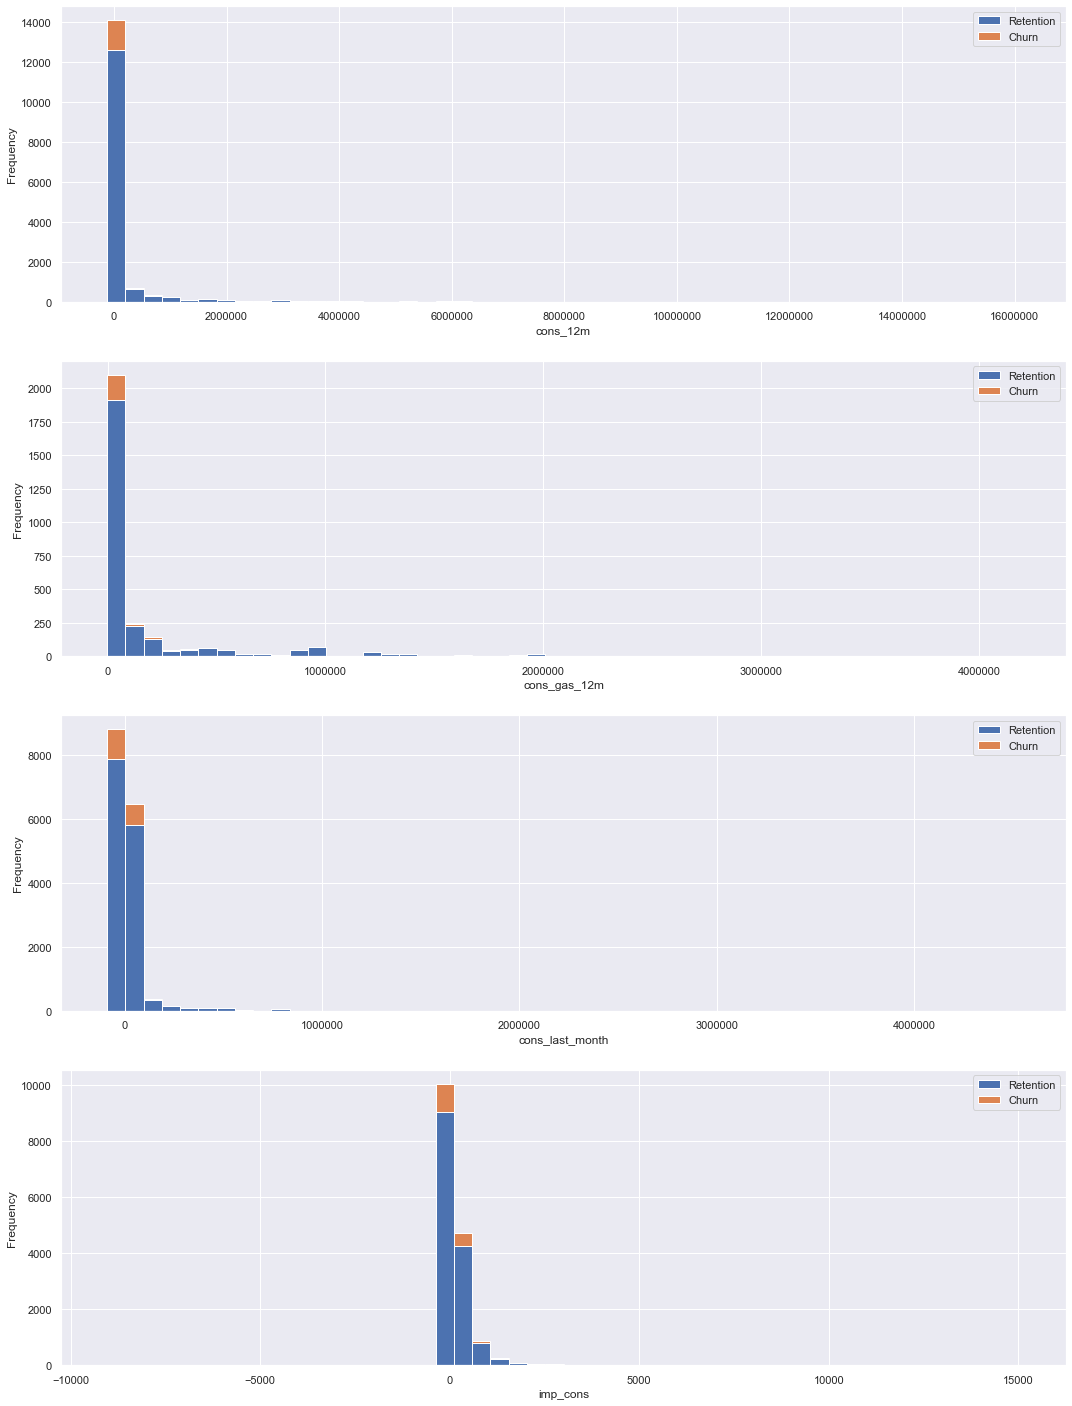

In [35]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))
plot_distribution(consumption, "cons_12m", axs[0])
plot_distribution(consumption[consumption["has_gas"]=="t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

It is cleat that there is a highly skewed distribution and outilers. The consumption data is highly skewed to the right.

#### B_4. Dates Data
Let's see the distribution of churned companies according to the date

In [36]:
dates = train[["id", "date_activ", "date_end", "date_modif_prod", "date_renewal", "churn"]]

In [37]:
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format = '%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format = '%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format = '%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format = '%Y-%m-%d')

<ipython-input-37-d23e3ec96b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates["date_activ"] = pd.to_datetime(dates["date_activ"], format = '%Y-%m-%d')
<ipython-input-37-d23e3ec96b85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates["date_end"] = pd.to_datetime(dates["date_end"], format = '%Y-%m-%d')
<ipython-input-37-d23e3ec96b85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [38]:
def line_format(label):
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
    return month

In [39]:
def plot_dates(dataframe, column, frontsize_=12):
    
    temp = dataframe[[column, "churn", 
                      "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    
    ax = temp.plot(kind='bar', stacked=True, figsize=(18,10), rot=0)
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    plt.xticks(fontsize=frontsize_)
    plt.ylabel("Number of companies")
    plt.legend(["Retension", "Churn"], loc="upper right")
    plt.show()

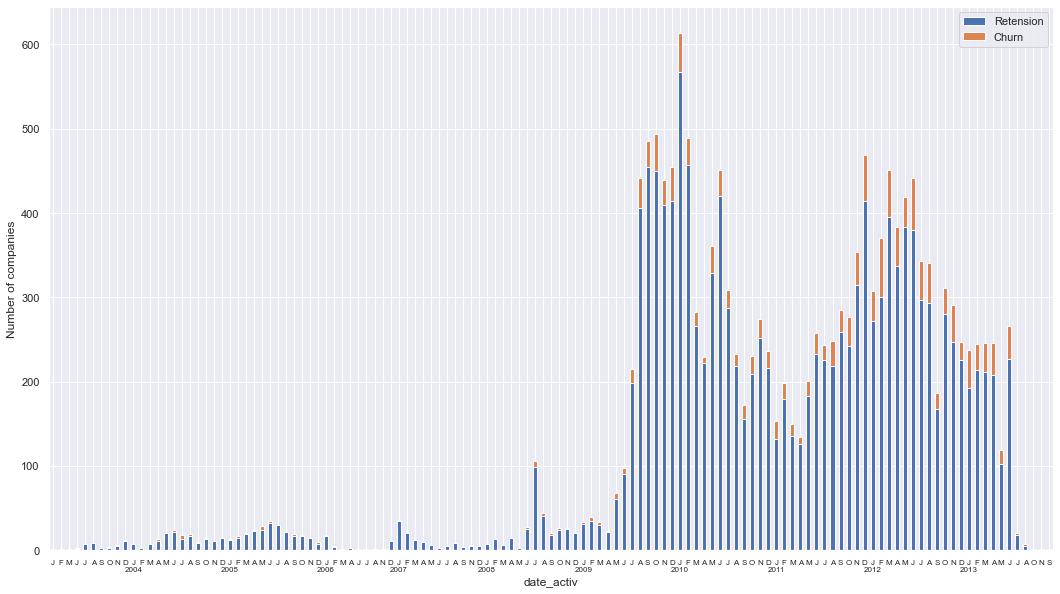

In [40]:
plot_dates(dates, "date_activ", frontsize_=8)

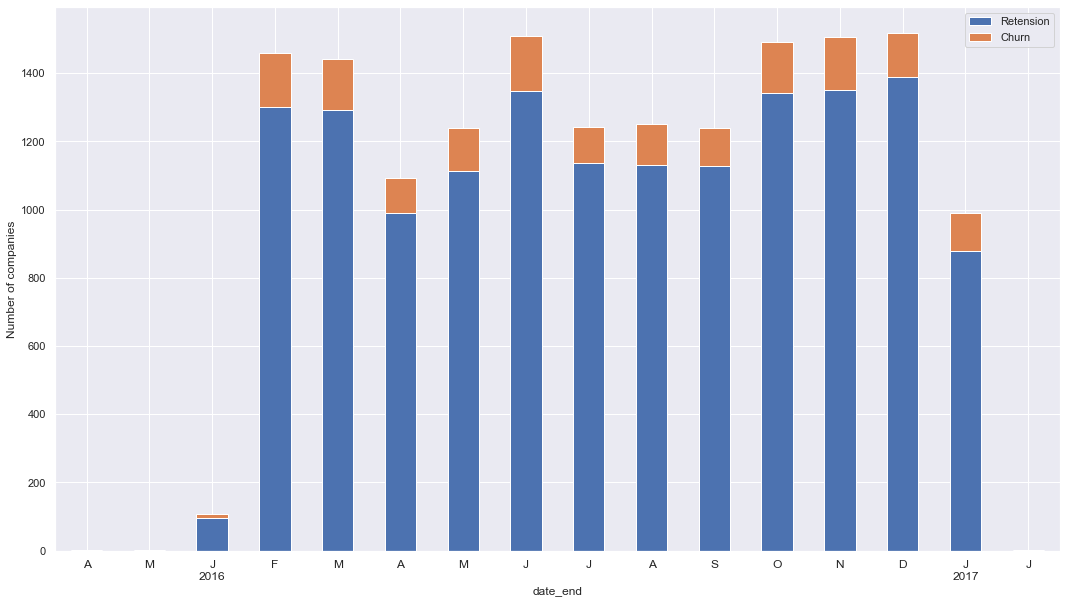

In [41]:
plot_dates(dates, "date_end")

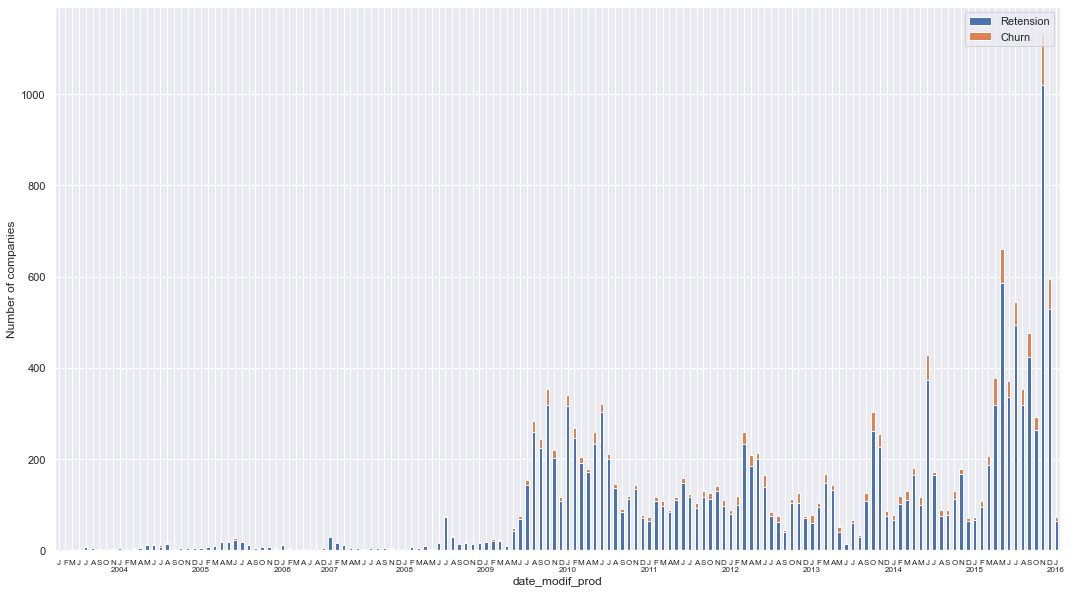

In [42]:
plot_dates(dates, "date_modif_prod", frontsize_=8)

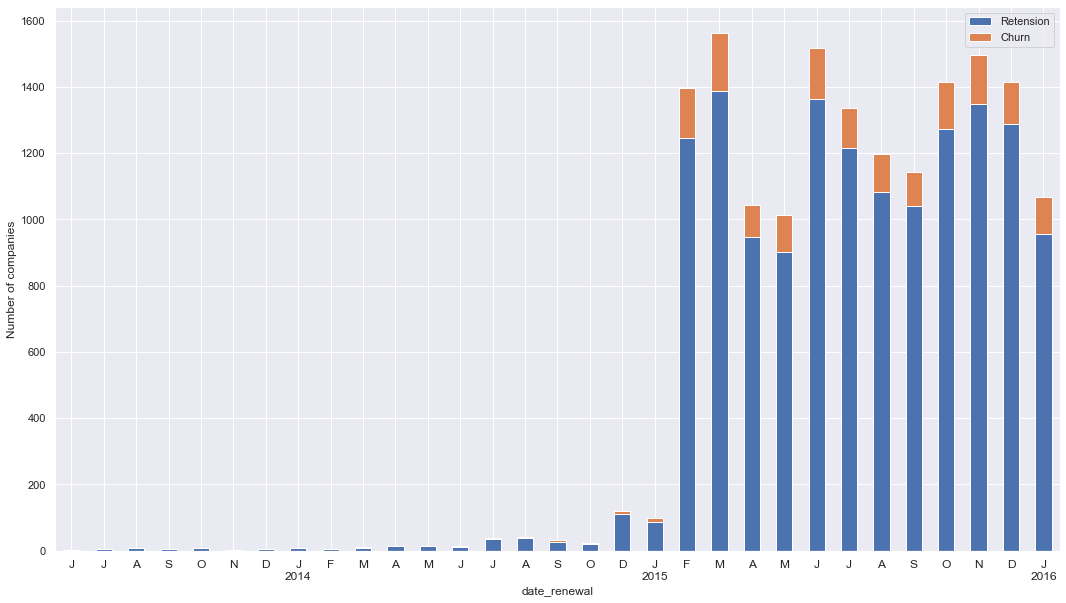

In [43]:
plot_dates(dates, "date_renewal")

We can visualize the distribution of churned companies according to the date, it does not provide any useful insight.

#### B_5. Forecast Data Distribution
Let's see the distribution of forecast data

In [44]:
forecast = train[["id", "forecast_base_bill_ele", "forecast_base_bill_year", "forecast_bill_12m", 
                  "forecast_cons", "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy", 
                  "forecast_meter_rent_12m", "forecast_price_energy_p1", "forecast_price_energy_p2", 
                  "forecast_price_pow_p1", "churn"]]

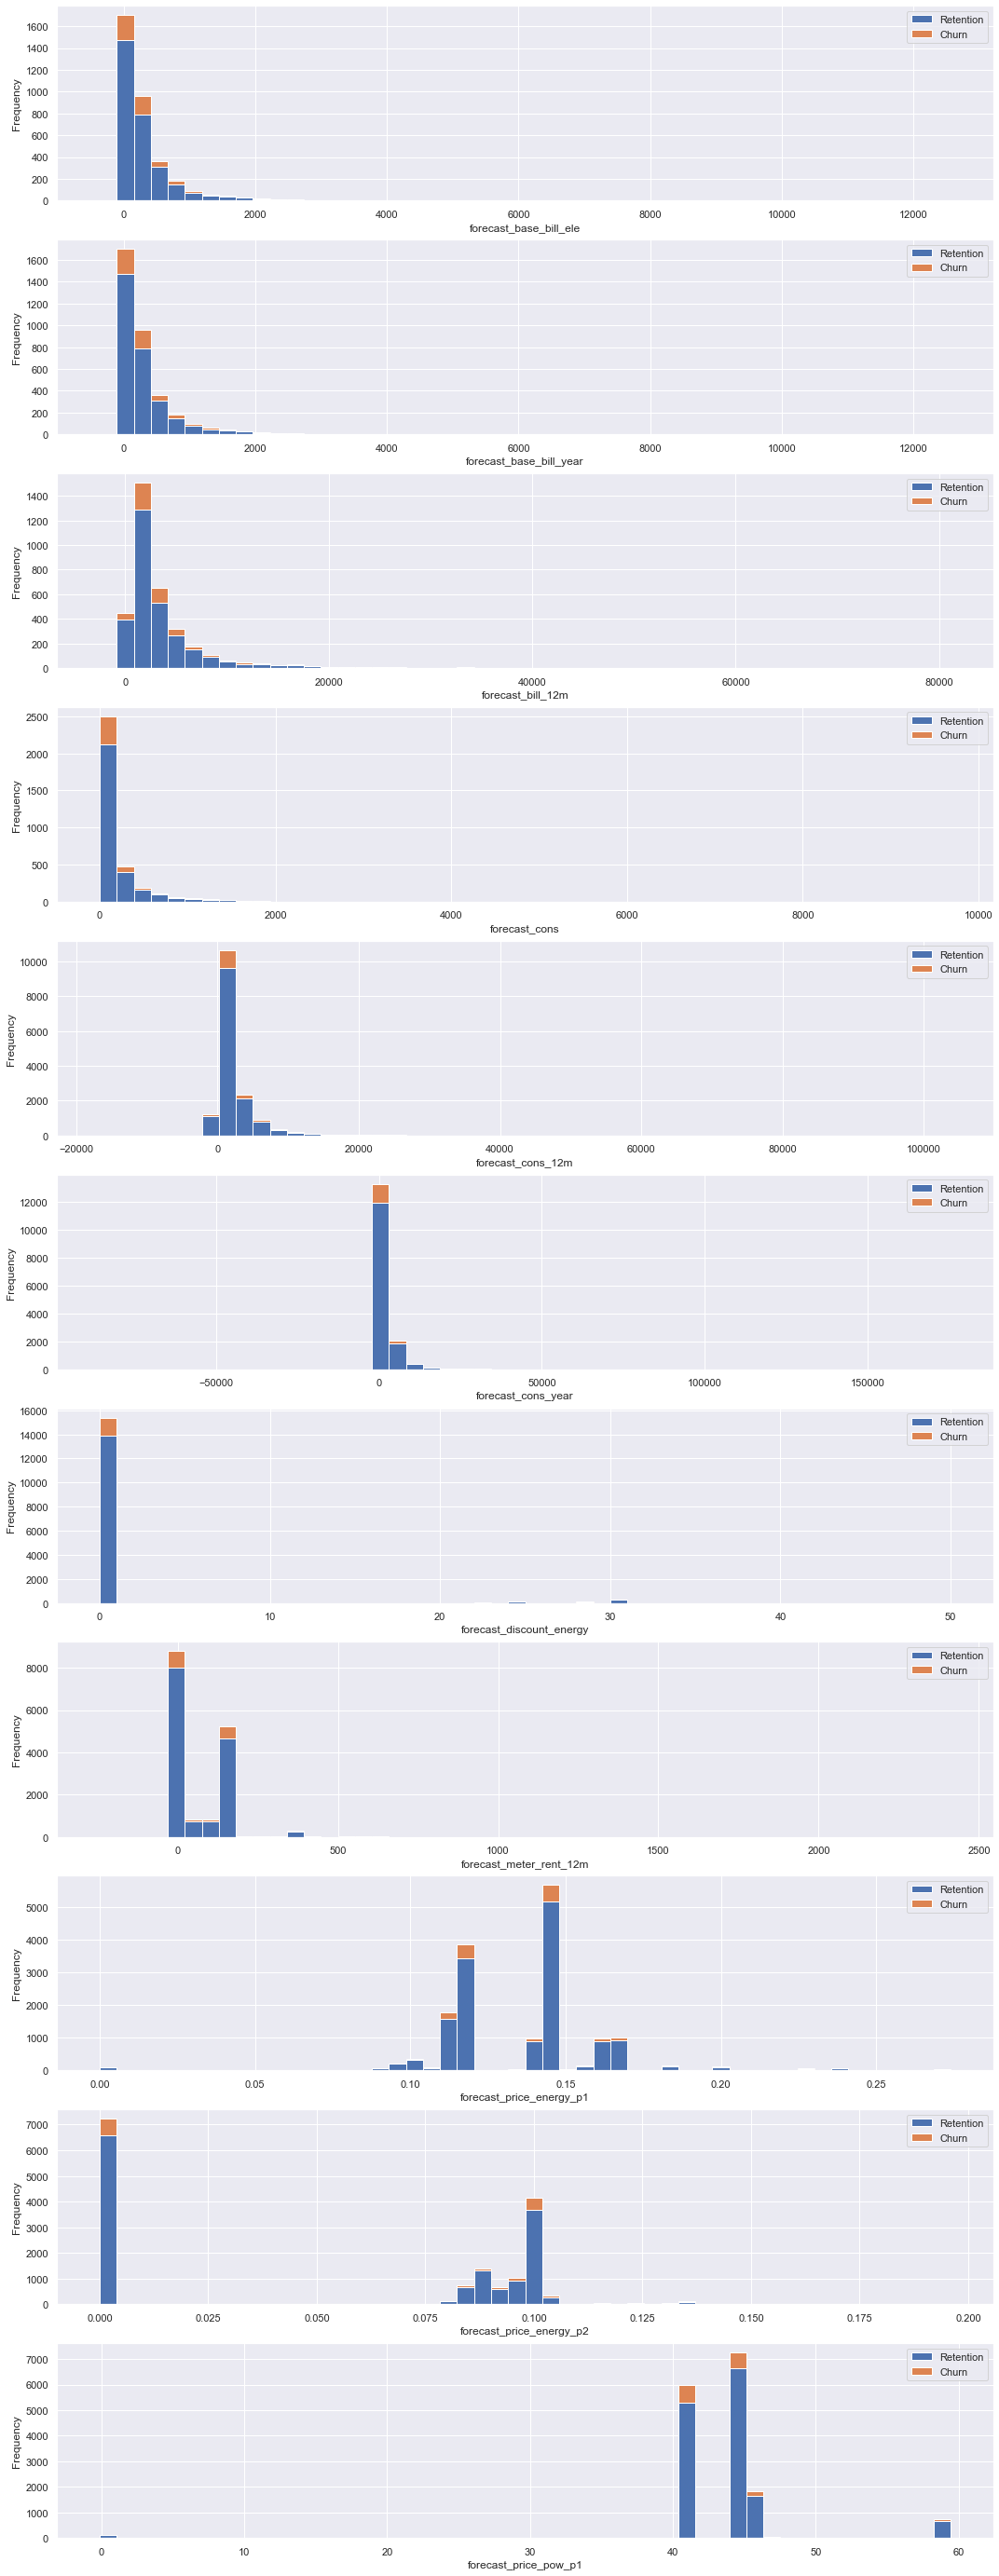

In [45]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
plot_distribution(train, "forecast_base_bill_ele", axs[0])
plot_distribution(train, "forecast_base_bill_year", axs[1])
plot_distribution(train, "forecast_bill_12m", axs[2])
plot_distribution(train, "forecast_cons", axs[3])
plot_distribution(train, "forecast_cons_12m", axs[4])
plot_distribution(train, "forecast_cons_year", axs[5])
plot_distribution(train, "forecast_discount_energy", axs[6])
plot_distribution(train, "forecast_meter_rent_12m", axs[7])
plot_distribution(train, "forecast_price_energy_p1", axs[8])
plot_distribution(train, "forecast_price_energy_p2", axs[9])
plot_distribution(train, "forecast_price_pow_p1", axs[10])

We can observe that a lot of variables arr highly skewed to the right, creating a ver long tail on the gigher values.

#### B_6. Contract Type
Let's see the contract type distribution for different companies

In [46]:
contract_type = train[["id", "has_gas", "churn"]]

In [47]:
contract = contract_type.groupby([contract_type["churn"],
                                 contract_type["has_gas"]])["id"].count().unstack(level=0)

In [48]:
contract

churn,0,1
has_gas,,
f,11771,1361
t,2730,234


In [49]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

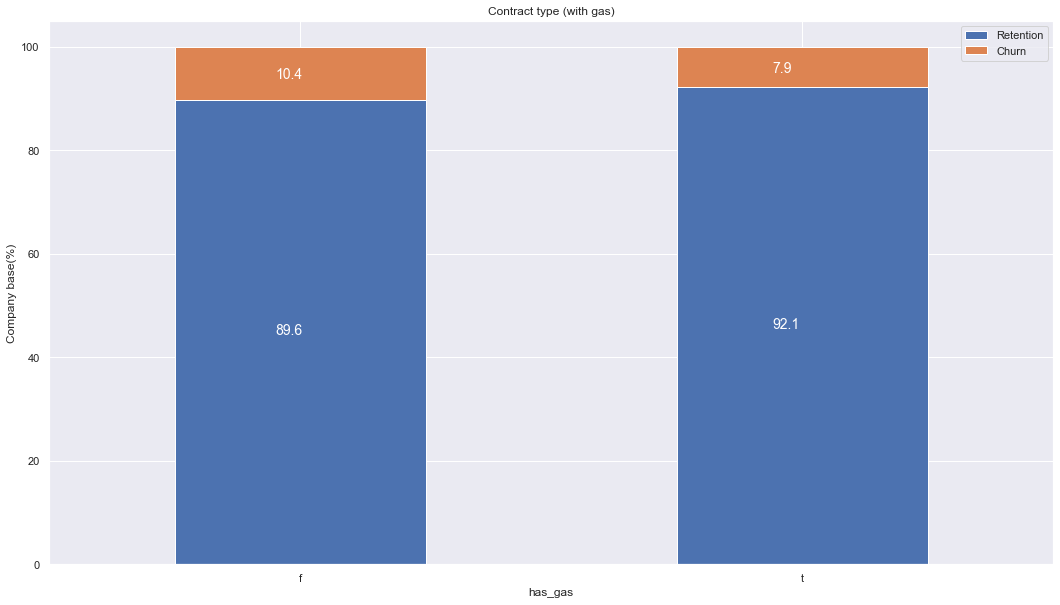

In [50]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

#### B_7. Margins
Let's see the margins data distribution

In [51]:
margin = train[["id", "margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]

C:\Users\HE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='net_margin'>

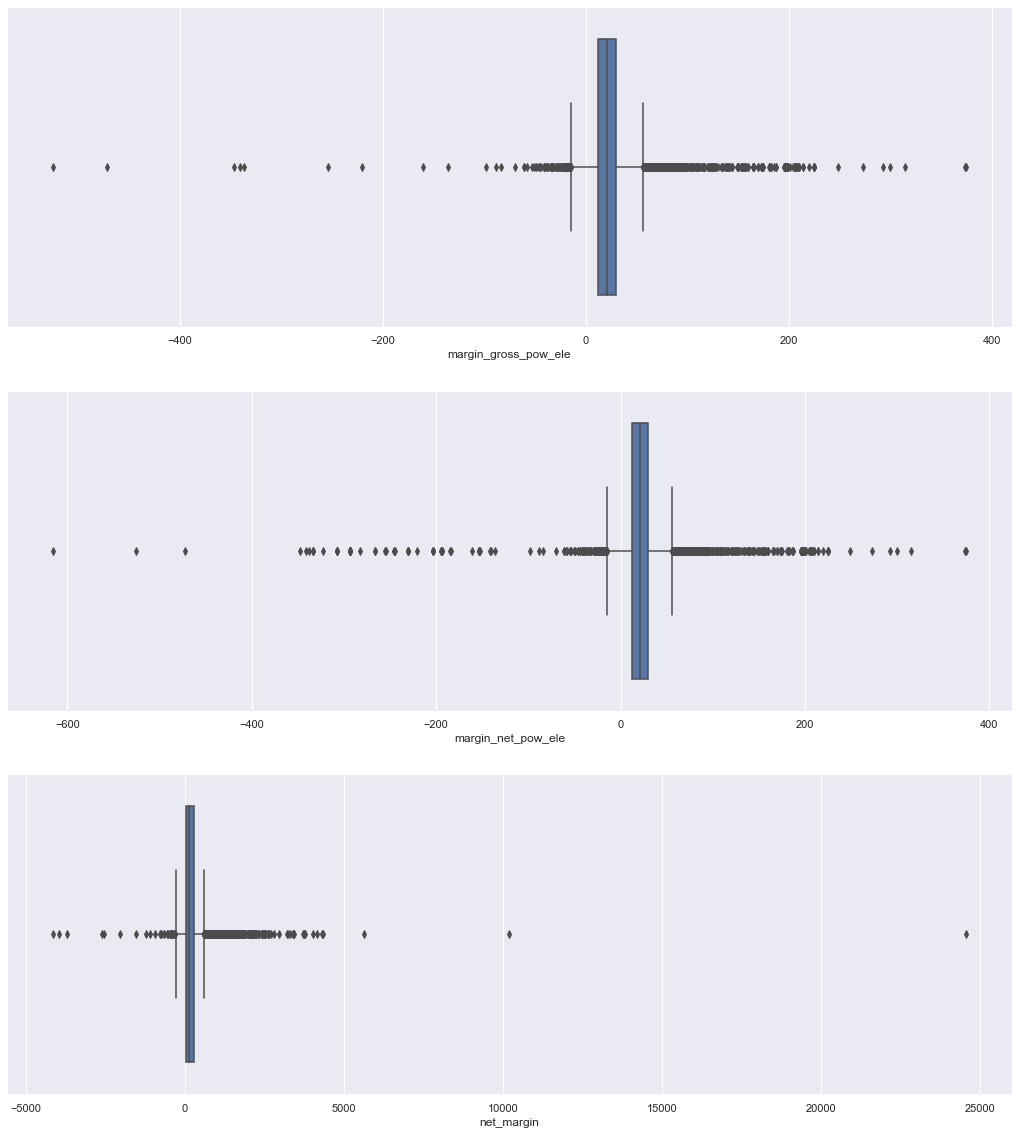

In [52]:
fig, axs = plt.subplots(nrows = 3, figsize=(18, 20))
sns.boxplot(margin["margin_gross_pow_ele"], ax = axs[0])
sns.boxplot(margin["margin_net_pow_ele"], ax = axs[1])
sns.boxplot(margin["net_margin"], ax = axs[2])

We can observe there is a few outliers as well.

#### B_8. Subscribed Power
Let's see the frequency of subscribed power

In [53]:
power = train[['id', "pow_max", "churn"]].fillna(0)

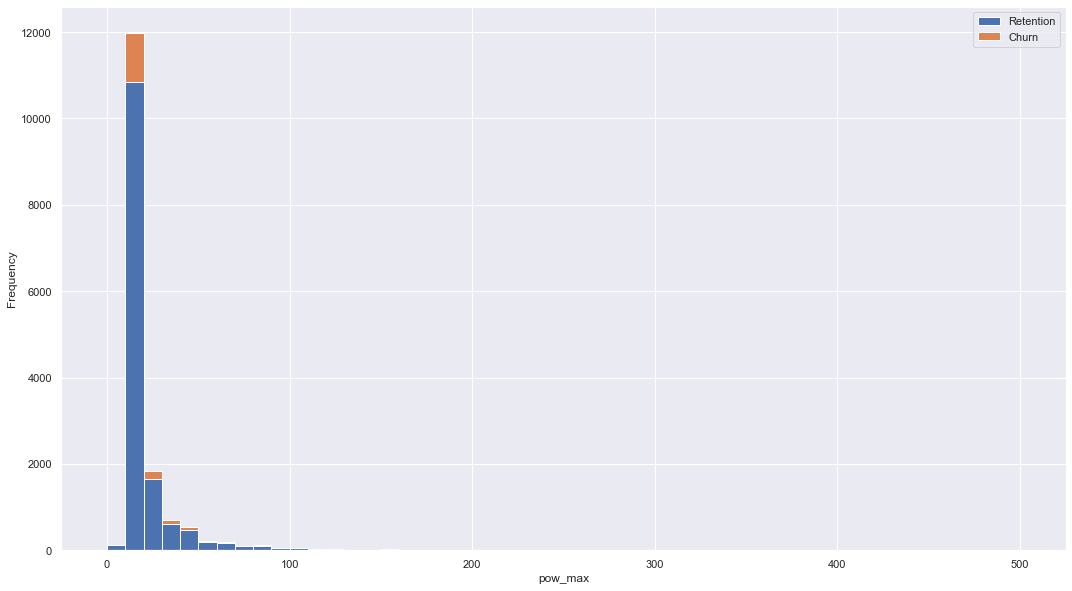

In [54]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

We can not find any useful information from this.

## C. Data Cleaning

#### C_1. Missing Data

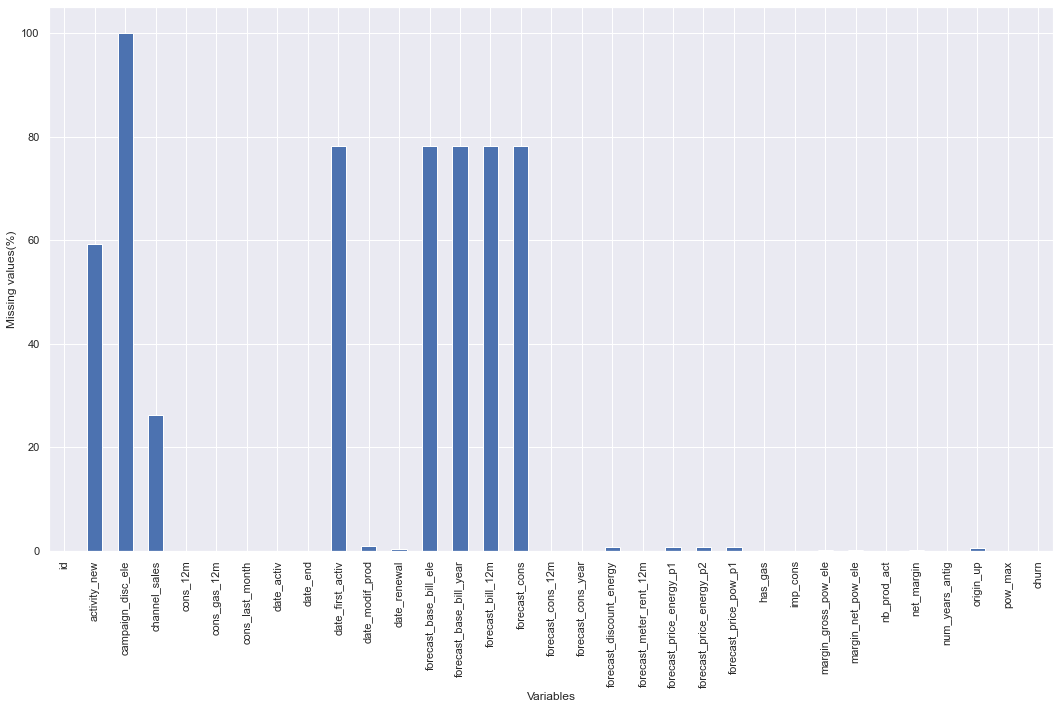

In [55]:
(train.isnull().sum()/len(train.index)*100).plot(kind="bar", figsize=(18,10))
plt.xlabel("Variables")
plt.ylabel("Missing values(%)")
plt.show()

In [56]:
train.drop(columns=["campaign_disc_ele", "date_first_activ", "forecast_base_bill_ele",
                   "forecast_base_bill_year", "forecast_bill_12m", "forecast_cons"], inplace=True)

In [57]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


#### C_2. Duplicates

In [58]:
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


## D. Data Formatting

#### D_1. Missing Dates

In [59]:
train.loc[train["date_modif_prod"].isnull(), "date_modif_prod"] = train["date_modif_prod"].value_counts().index[0]
train.loc[train["date_end"].isnull(), "date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(), "date_renewal"] = train["date_renewal"].value_counts().index[0]

#### D_2. Missing Data

In [60]:
missing_data_per = history_data.isnull().sum()/len(history_data.index)*100

<function matplotlib.pyplot.show(close=None, block=None)>

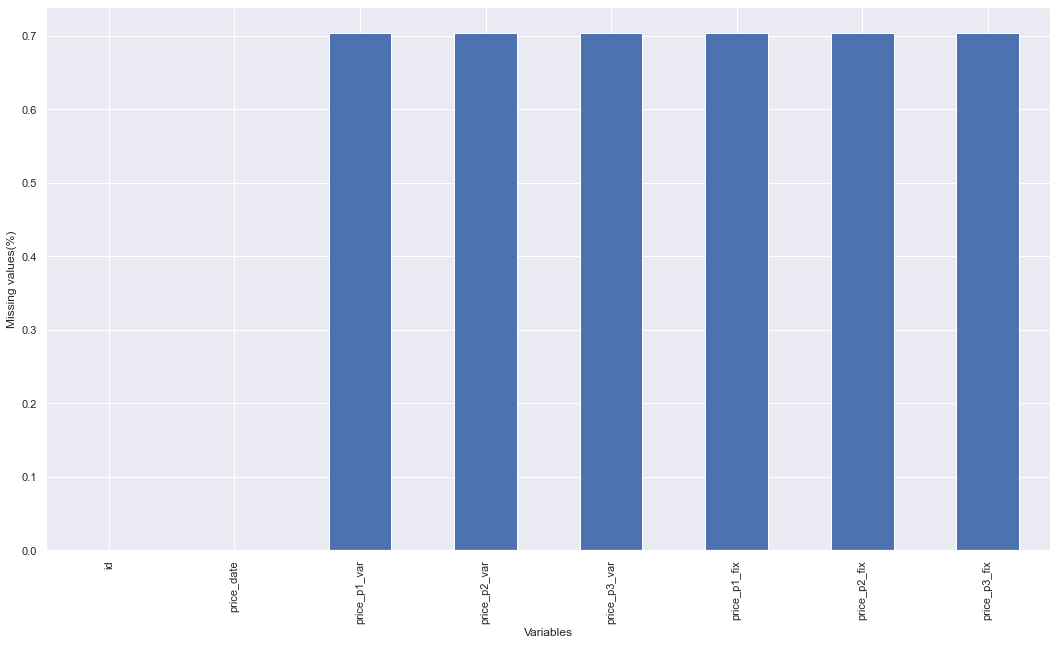

In [61]:
missing_data_per.plot(kind="bar", figsize=(18,10))
plt.xlabel("Variables")
plt.ylabel("Missing values(%)")
plt.show

In [62]:
history_data.loc[history_data["price_p1_var"].isnull(), "prive_p1_var"] = history_data["price_p1_var"].median()
history_data.loc[history_data["price_p2_var"].isnull(), "prive_p2_var"] = history_data["price_p2_var"].median()
history_data.loc[history_data["price_p3_var"].isnull(), "prive_p3_var"] = history_data["price_p3_var"].median()
history_data.loc[history_data["price_p1_fix"].isnull(), "prive_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"].isnull(), "price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"].isnull(), "price_p3_fix"] = history_data["price_p3_fix"].median()

#### D_2. Formating Dates

In [63]:
train["date_activ"] = pd.to_datetime(train["date_activ"], format="%Y-%m-%d")
train["date_end"] = pd.to_datetime(train["date_end"], format="%Y-%m-%d")
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format="%Y-%m-%d")
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format="%Y-%m-%d")

#### D_3. Negative Data

In [64]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,prive_p1_var,prive_p2_var,prive_p3_var,prive_p1_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,193002.000000,193002.000000,1.359000e+03,1.359000e+03,1359.0,1.359000e+03
mean,0.140991,0.054412,0.030712,43.325546,10.622871,6.409981,1.460330e-01,8.548300e-02,0.0,4.426693e+01
std,0.025117,0.050033,0.036335,5.437952,12.841899,7.773595,2.859877e-15,6.386132e-16,0.0,5.259952e-13
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172,1.460330e-01,8.548300e-02,0.0,4.426693e+01
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,1.460330e-01,8.548300e-02,0.0,4.426693e+01
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,1.460330e-01,8.548300e-02,0.0,4.426693e+01
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389,1.460330e-01,8.548300e-02,0.0,4.426693e+01
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,1.460330e-01,8.548300e-02,0.0,4.426693e+01


In [65]:
history_data[(history_data.price_p1_fix < 0) | (history_data.price_p2_fix < 0) | (history_data.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,prive_p1_var,prive_p2_var,prive_p3_var,prive_p1_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166,NaN,NaN,NaN,NaN
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166,NaN,NaN,NaN,NaN
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166,NaN,NaN,NaN,NaN
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166,NaN,NaN,NaN,NaN
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172,NaN,NaN,NaN,NaN
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166,NaN,NaN,NaN,NaN
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172,NaN,NaN,NaN,NaN
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000,NaN,NaN,NaN,NaN
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166,NaN,NaN,NaN,NaN
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166,NaN,NaN,NaN,NaN


In [66]:
history_data.loc[history_data["price_p1_fix"] < 0, "price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"] < 0, "price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"] < 0, "price_p3_fix"] = history_data["price_p3_fix"].median()